### Imports

In [1]:
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.base import clone

### Load Data

In [2]:
# X = np.load('X.npy')
# X = np.load('X_left.npy')
X = np.load('X_right.npy')
y = np.load('y.npy')

### Split Test Train

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=0)

### Learning Curve

In [4]:
def learning_curve(model, X_train, X_test, y_train, y_test):
    train_scores = []
    test_scores = []
    
    for i in np.arange(0.1, 1.1, 0.1):
        train_size = int(len(X_train) * i)
        X_train_ = X_train[:train_size]
        y_train_ = y_train[:train_size]
        
        model_ = clone(model)
        model_.fit(X_train_, y_train_)
        train_pred = model_.predict(X_train_)
        test_pred = model_.predict(X_test)
        
        train_acc = accuracy_score(y_train_, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        
        train_scores.append(train_acc)
        test_scores.append(test_acc)
        
        print(f'{int(i * 100)}%', end=' ')
    print()
        
    plt.plot(train_scores, label='Train')
    plt.plot(test_scores, label='Test')
    plt.title('Learning Curve')
    plt.ylabel('Accuracy')
    plt.xlabel('% of Training Size')
    plt.xticks(range(10), (np.arange(0.1, 1.1, 0.1) * 100).astype(int))
    plt.ylim(0.0, 1.01)
    plt.legend()
    
    print(f'Final Training Accuracy: {train_scores[-1] * 100}%')
    print(f'Final Testing Accuracy: {test_scores[-1] * 100}%')

### Models

##### Random Forest Classifier

10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
Final Training Accuracy: 100.0%
Final Testing Accuracy: 63.63636363636363%


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

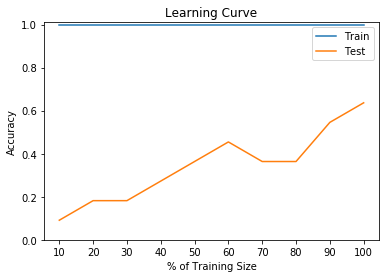

In [5]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
learning_curve(rfc, X_train, X_test, y_train, y_test)
rfc.fit(X_train, y_train)

### Save

In [6]:
with open('rfc', 'wb') as file: pickle.dump(rfc, file)